#  Counts of Game theory equilibrium when R = W, N = 10000 simulations

Graphs of $p_L*c$ vs $R$ for both Review and Guess strategy and the threshold line

In [178]:
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'  # clears up blurry images 

sns.color_palette("pastel")
plt.style.use('seaborn-muted')
sns.set_style('ticks')

color_dict_strategy = {"Guess": "tab:blue", "Not_Unique" : "black", "Review": "tab:green"}
color_dict_params = sns.color_palette("crest", as_cmap=True)

# Create the folder to save images based on project directory
project_root_dir = "."
fig_foldername = 'figs_R_W_equal'
figs_path = os.path.join(project_root_dir, fig_foldername)

def save_fig(name, images_path=figs_path, tight_layout=False, extension="png", resolution=300):
    """ Saves figure in the fig folder in project root directory"""
    if not os.path.isdir(images_path):
        os.makedirs(images_path)
    path = os.path.join(images_path, name + "." + extension)
    print("Saving figure:", name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=extension, dpi=resolution)

In [179]:
payoff_full = pd.read_csv('payoff_R_W_equal.csv')
payoff_full.head();
# Drop rows where there is no equilibrium 
nashexists = payoff_full.dropna()
#nashexists.head()
nashexists.describe();
payoff_full.describe()

,pT,W,R,pL,c,pL*c,pQ,Max_R1_Payoff,Max_R2_Payoff,Max_Payoff,Number_Eqs,Strategy
count,10000.0,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.5,50.025900,50.025900,0.495323,25.45060,12.563663,1.0,38.731927,40.247698,40.247698,1.674500,1.235200
std,0.0,29.181929,29.181929,0.290014,14.39061,11.040335,0.0,27.510591,27.469101,27.469101,0.914895,0.740092
min,0.5,0.000000,0.000000,0.000053,1.00000,0.000932,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.5,25.000000,25.000000,0.244684,13.00000,3.566977,1.0,14.500000,15.982500,15.982500,1.000000,1.000000
50%,0.5,50.000000,50.000000,0.491647,25.00000,9.333309,1.0,34.000000,37.350000,37.350000,1.000000,1.000000
75%,0.5,75.000000,75.000000,0.748248,38.00000,19.076064,1.0,61.432500,62.925000,62.925000,2.000000,2.000000
max,0.5,100.000000,100.000000,0.999989,50.00000,49.968344,1.0,99.990000,99.990000,99.990000,4.000000,2.000000


In [180]:
# Main dataframe used for further analysis
payoff = nashexists

print(payoff.columns)
payoff['Strategy_Name'].value_counts()


Index(['pT', 'W', 'R', 'pL', 'c', 'pL*c', 'pQ', 'R1_array', 'R2_array',
       'Max_R1_Payoff', 'Max_R2_Payoff', 'Max_Payoff', 'Eq', 'Number_Eqs',
       'Strategy_Name', 'Strategy'],
      dtype='object')


Not_Unique    4191
Review        3970
Guess         1839
Name: Strategy_Name, dtype: int64

In [181]:
# Subset of payoffs with a unique Nash Equilibrium 
onenash = payoff.loc[payoff['Number_Eqs'] == 1]
onenash.head()
onenash.describe();
# Subset of payoffs with a unique Nash Equilibrium: Strategy to Review

one_nash_review = onenash.loc[onenash['Strategy_Name'] == "Review"]
one_nash_review.head()
one_nash_review.describe();

# Subset of payoffs with a unique Nash Equilibrium: Strategy to Guess

one_nash_guess = onenash.loc[onenash['Strategy_Name'] == "Guess"]
one_nash_guess.head()
one_nash_guess.describe();

Saving figure: pLc_vs_W_Review


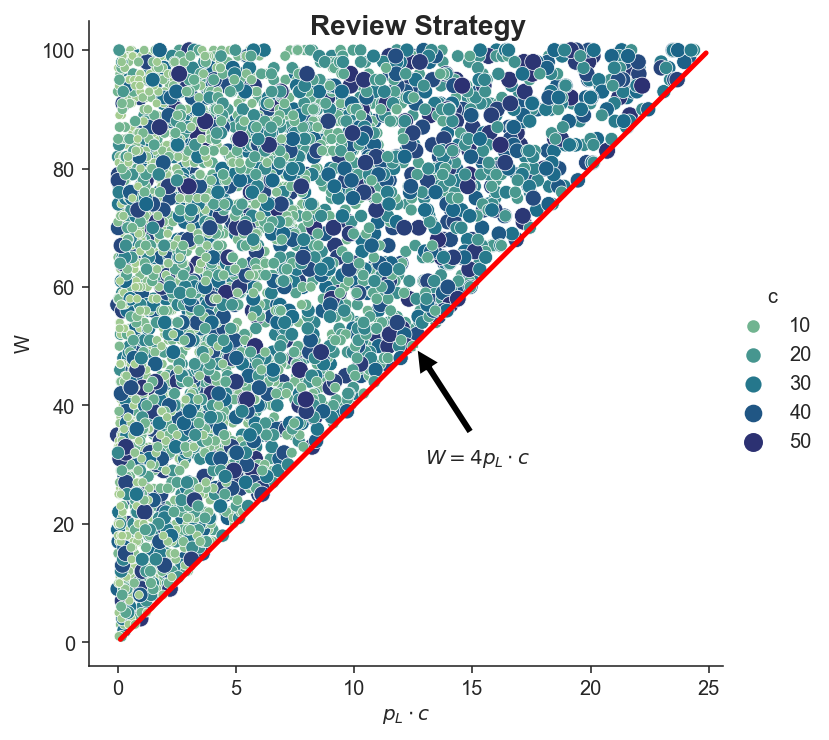

In [182]:
# Graph of pL*c vs R : Review Strategy
g = sns.relplot(data=one_nash_review,
        x='pL*c', y='W',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.fig.suptitle("Review Strategy", fontsize=14, fontweight='bold')
g.set_axis_labels('$p_L \cdot c$')
# Text 
plt.annotate("$W = 4 p_L \cdot c$", xy=(13, 31), xycoords='data', va='center', ha='left')
# Arrow
plt.annotate('', xy=(4*np.pi, 50), xytext=(15, 35),
        arrowprops=dict(facecolor='black', shrink=0.03, lw = 1))
# Line
plt.annotate('', xy=(0, 0), xytext=(25, 100), xycoords='data', 
        arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc', lw = 2.5))

save_fig('pLc_vs_W_Review')


Saving figure: pLc_vs_W_Guess


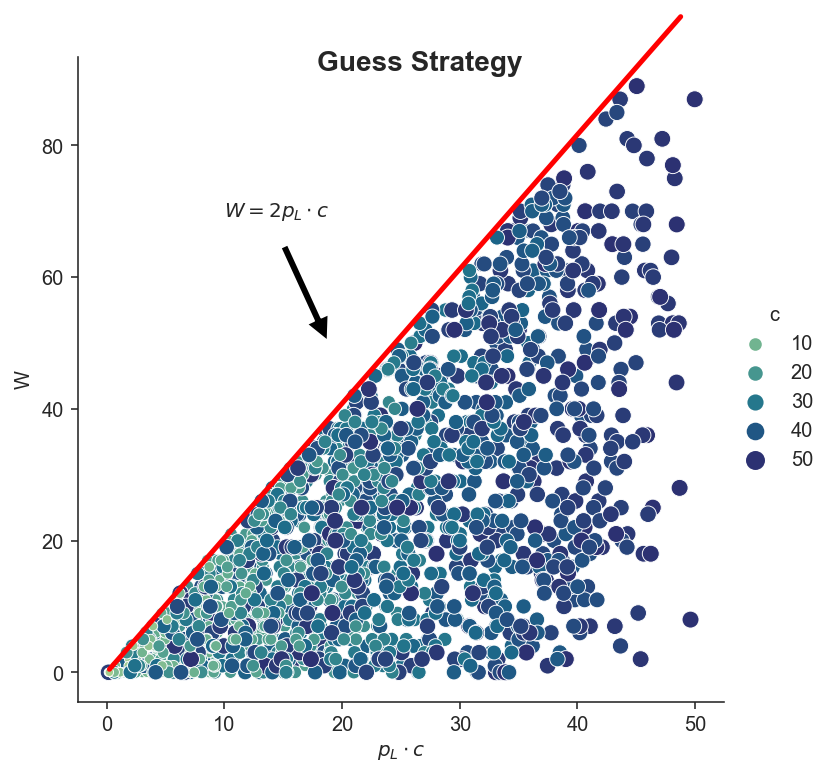

In [183]:
# Graph of pL*c vs R : Guess Strategy
g = sns.relplot(data=one_nash_guess,
        x='pL*c', y='W',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.fig.suptitle("Guess Strategy", fontsize=14, fontweight='bold')
g.set_axis_labels('$p_L \cdot c$')
# Text
plt.annotate("$W = 2p_L \cdot c$", xy=(10, 70), xycoords='data', va='center', ha='left')
# Arrow
plt.annotate('', xy=(6*np.pi, 50), xytext=(15, 65), xycoords = 'data',
        arrowprops=dict(facecolor='black', shrink=0.02))
# Line
plt.annotate('', xy=(0, 0), xytext=(49, 100), xycoords='data', 
        arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc', lw = 2.5))

save_fig('pLc_vs_W_Guess')
